In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# seting dimension for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# read csv file and create a copy
cars_data = pd.read_csv("dataset\cars_sampled.csv")
cars = cars_data.copy()


In [4]:
# summarize the dataset
cars.info()
pd.set_option('max_columns',500)
cars.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [5]:
# remove unwanted columns and duplicate data
cols = ['dateCrawled','lastSeen','postalCode','dateCreated','name']
cars = cars.drop(columns = cols,axis=1)
cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


In [6]:
# data cleaning
#==============================================================================

#missing values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [7]:
# variable year of registration
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
# working range 1950-2018

38

In [8]:
# variable price
sum(cars['price'] < 100)
sum(cars['price'] > 150000)
# working range 100-150000

34

In [9]:
# variable powerPS
sum(cars['powerPS'] < 10)
sum(cars['powerPS'] > 500)
# working range 10-500

115

In [10]:
# working range of data
cars = cars[(cars.yearOfRegistration >= 1950) & (cars.yearOfRegistration <= 2018) &
            (cars.price >= 100) & (cars.price <= 150000) & (cars.powerPS >= 10) &
            (cars.powerPS <= 500)]


cars['monthOfRegistration'] /= 12

In [11]:
# create new variable age by combining year and month of registration
cars['Age'] = (2018-cars['yearOfRegistration'] + cars['monthOfRegistration'])
cars['Age'] = round(cars['Age'],2)

In [12]:
# drop year and month of registration
cars = cars.drop(columns = ['monthOfRegistration','yearOfRegistration'],axis = 1)

# visualising parameters
#==============================================================================

C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Age'>

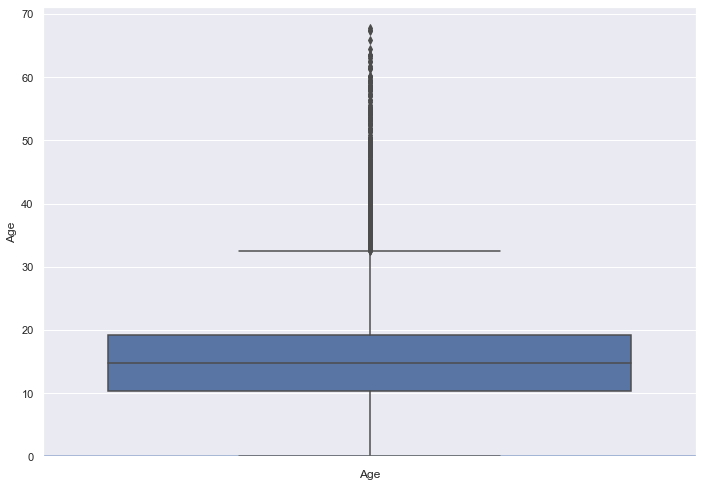

In [13]:

# age
sns.distplot(cars['Age'])
sns.boxplot(y = cars['Age'])


C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

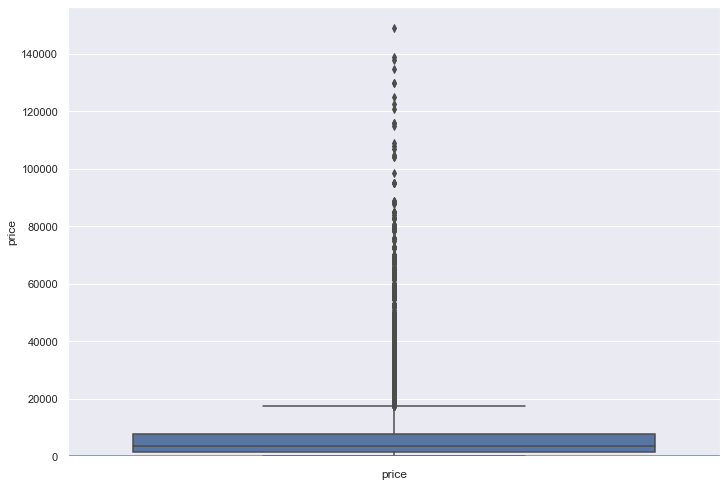

In [14]:
# price
sns.distplot(cars['price'])
sns.boxplot(y = cars['price'])

C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

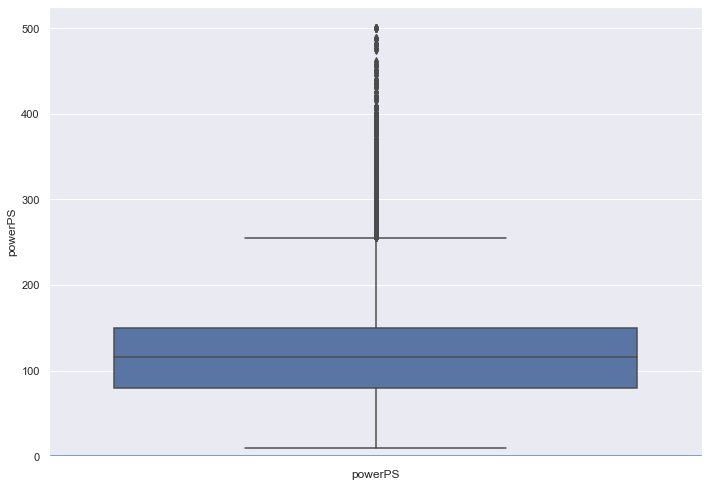

In [15]:
# powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y = cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

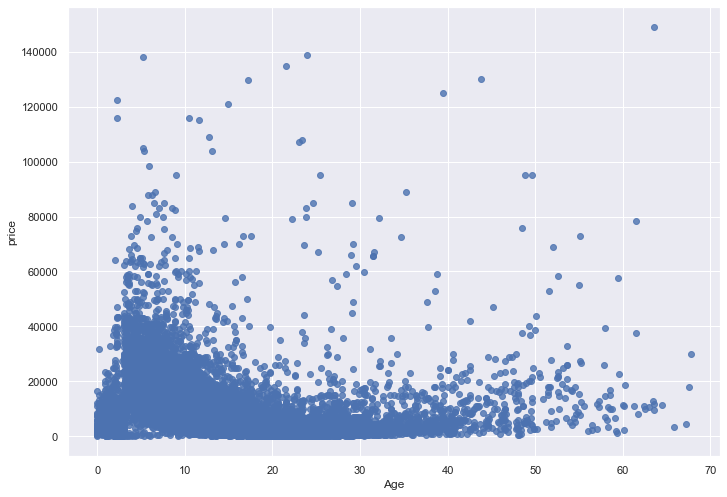

In [16]:
# age vs price
sns.regplot(x='Age', y='price', scatter=True, fit_reg = False, data=cars)


<AxesSubplot:xlabel='Age', ylabel='price'>

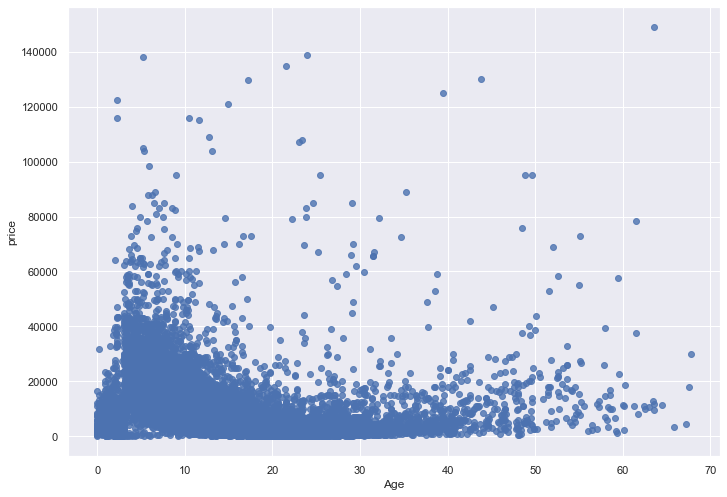

In [17]:
# age vs price
sns.regplot(x='Age', y='price', scatter=True, fit_reg = False, data=cars)


In [18]:
# variable offerType 
cars['offerType'].value_counts()
# only one type so drop it

offer    42772
Name: offerType, dtype: int64

<AxesSubplot:xlabel='abtest', ylabel='count'>

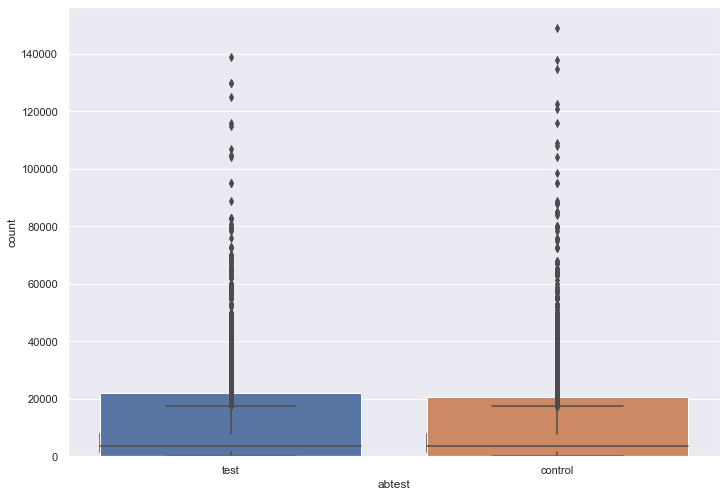

In [19]:
# variable abtest
cars['abtest'].value_counts()
sns.boxplot(y='price', x='abtest', data=cars)
# both have same effect hence insignificant
sns.countplot(x='abtest', data=cars)

In [20]:
# variable seller
cars['seller'].value_counts()
# all except one private, hence drop it

private       42771
commercial        1
Name: seller, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='price'>

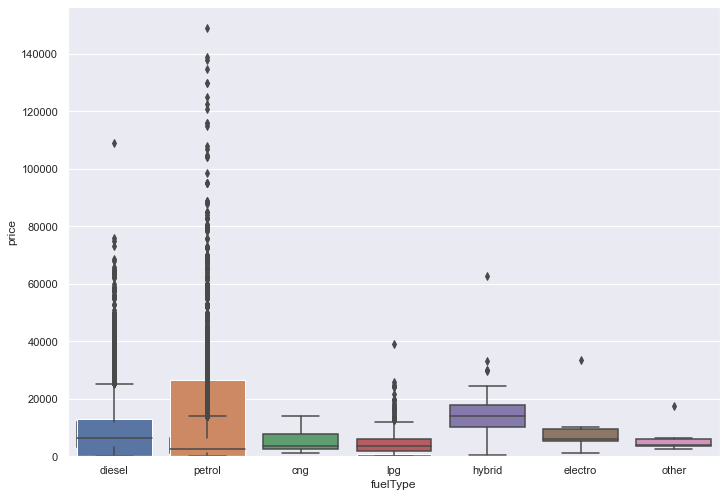

In [21]:
# variable fuelType
cars['fuelType'].value_counts()
sns.countplot(x='fuelType', data=cars)
sns.boxplot(y='price', x='fuelType', data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

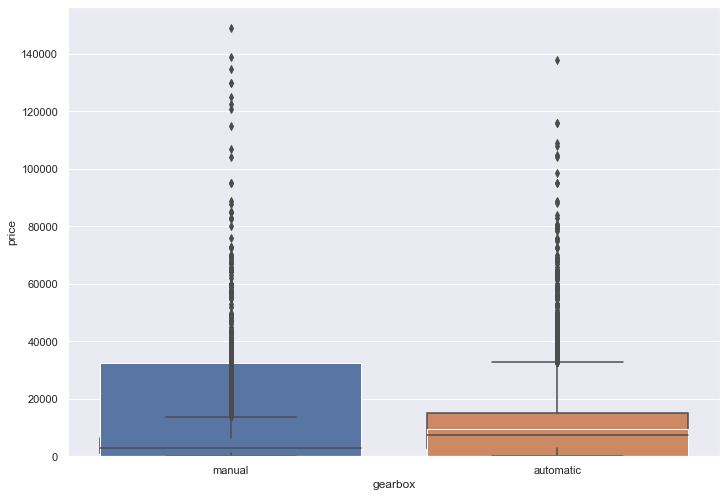

In [22]:
# variable gearbox
cars['gearbox'].value_counts()
sns.countplot(x='gearbox', data=cars)
sns.boxplot(y='price', x='gearbox', data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

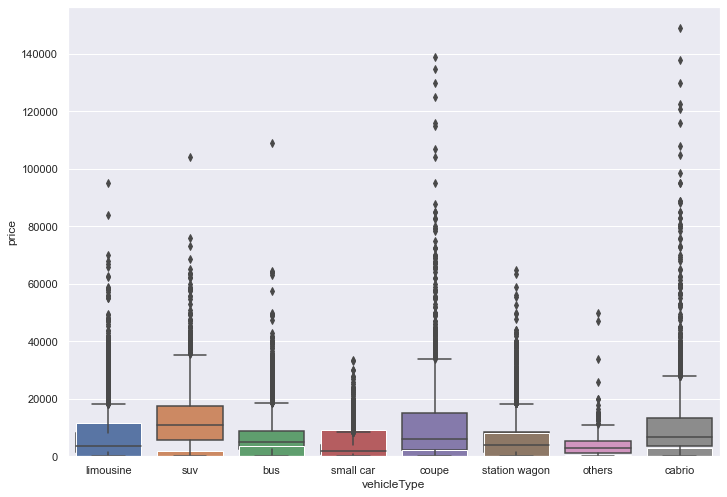

In [23]:
# variable vehicleType
cars['vehicleType'].value_counts()
sns.countplot(x='vehicleType', data=cars)
sns.boxplot(y='price', x='vehicleType', data=cars)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

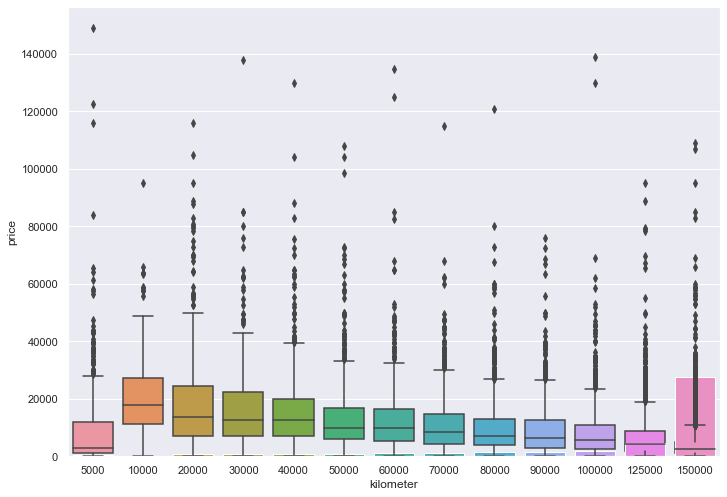

In [24]:
# variable kilometer
cars['kilometer'].value_counts()
sns.countplot(x='kilometer', data=cars)
sns.boxplot(y='price', x='kilometer', data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

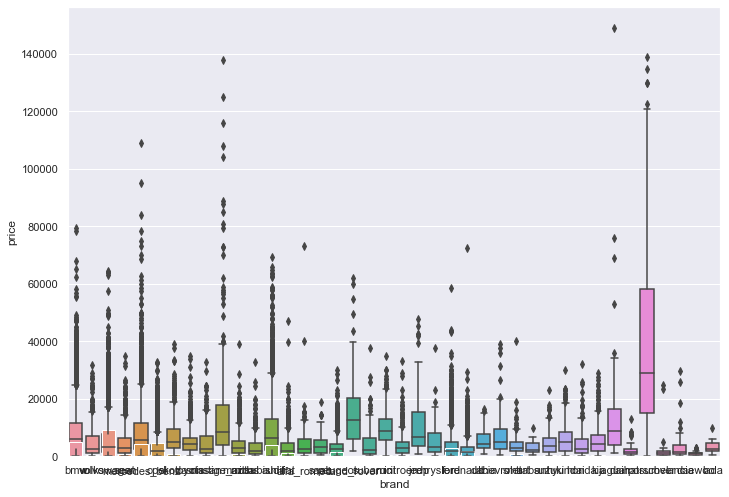

In [25]:

# variable brand
cars['brand'].value_counts()
sns.countplot(x='brand', data=cars)
sns.boxplot(y='price', x='brand', data=cars)


<AxesSubplot:xlabel='model', ylabel='price'>

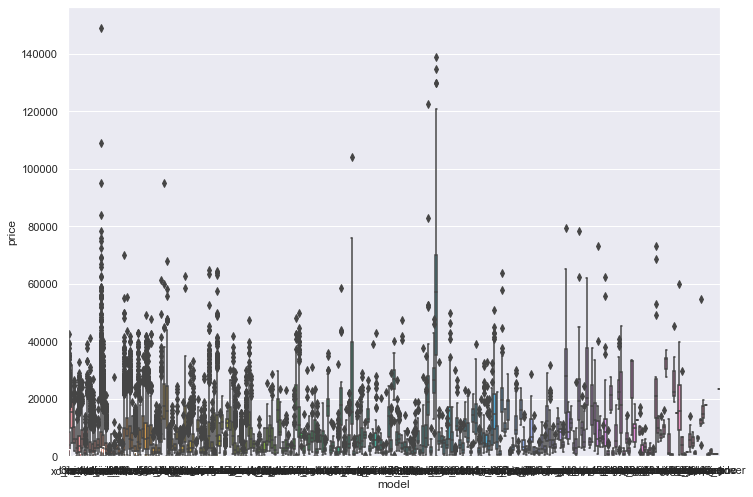

In [26]:
# variable model
cars['model'].value_counts()
sns.countplot(x='model', data=cars)
sns.boxplot(y='price', x='model', data=cars)


<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

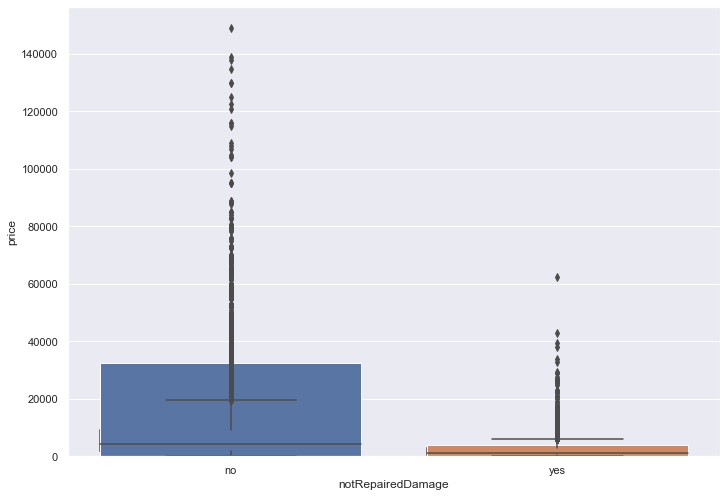

In [27]:
# variable notRepairedDamage
cars['notRepairedDamage'].value_counts()
sns.countplot(x='notRepairedDamage', data=cars)
sns.boxplot(y='price', x='notRepairedDamage', data=cars)

In [28]:
# removing insignificant variables
col = ['offerType','seller', 'abtest']
cars.drop(columns = col, axis = 1,inplace=True)
cars_copy = cars.copy()

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
# Correlation between numerical variables
cars_select1 =  cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
round(correlation, 3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS      0.575234
kilometer    0.440138
Age          0.335821
Name: price, dtype: float64

In [31]:
# Omitting missing values
cars_omit = cars.dropna(axis=0)

In [32]:
#Converting categorical variables to dummy variables
cars_omit = pd.get_dummies(cars_omit, drop_first=True)

In [33]:
cars_omit.shape

(32884, 301)

In [34]:
cars.dropna(axis=0,inplace=True)

In [35]:
vehicleTypeEnc = OneHotEncoder(drop='first')
gearboxEnc= OneHotEncoder(drop='first')
modelEnc = OneHotEncoder(drop='first')
fuelTypeEnc = OneHotEncoder(drop='first')
brandEnc = OneHotEncoder(drop='first')
nrdEnc = OneHotEncoder(drop='first')


ve = vehicleTypeEnc.fit_transform(cars[['vehicleType']]).toarray()
ge = gearboxEnc.fit_transform(cars[['gearbox']]).toarray()
me = modelEnc.fit_transform(cars[['model']]).toarray()
fe = fuelTypeEnc.fit_transform(cars[['fuelType']]).toarray()
be = brandEnc.fit_transform(cars[['brand']]).toarray()
ne = nrdEnc.fit_transform(cars[['notRepairedDamage']]).toarray()

encoders = {
    'vt':vehicleTypeEnc,
    'gear':gearboxEnc,
    'model':modelEnc,
    'fuel':fuelTypeEnc,
    'brand':brandEnc,
    'nrd':nrdEnc,
}

In [36]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [37]:
modelEnc.transform([['ibiza']]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

# model building with omitted data

In [38]:
encoded_data = np.hstack((ve,ge,me,fe,be,ne,))

In [39]:
cars.describe()

,price,powerPS,kilometer,Age
count,32884.000000,32884.000000,32884.000000,32884.000000
mean,6782.165248,129.120940,124043.759883,15.019687
std,8288.544249,60.748646,39714.394117,6.279313
min,100.000000,10.000000,5000.000000,0.420000
25%,1690.000000,86.000000,100000.000000,10.500000
50%,3999.000000,116.000000,150000.000000,14.670000
75%,8800.000000,156.000000,150000.000000,18.920000
max,149000.000000,500.000000,150000.000000,67.500000


In [40]:
encoded_data.shape

(32884, 297)

In [41]:
# separating input and output features
y1= cars['price']

array([[<AxesSubplot:title={'center':'1 Before'}>,
        <AxesSubplot:title={'center':'2 After'}>]], dtype=object)

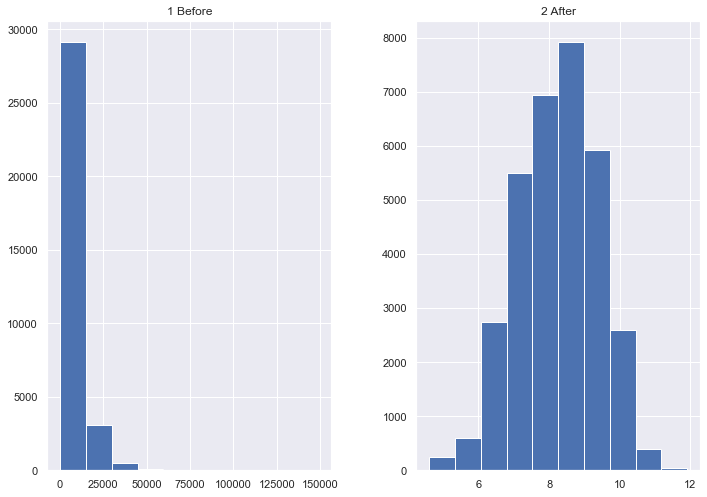

In [42]:
# plotting the variable price
prices = pd.DataFrame({"1 Before": y1, "2 After": np.log(y1)})
prices.hist()

In [43]:
#transforming price as a logarithmic value to get rid of skewness
# y1 = np.log(y1)

In [44]:
cars['price']

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 32884, dtype: int64

In [45]:
number_df = cars[['powerPS','kilometer','Age']].copy()

In [46]:
x1 = np.hstack([number_df.values, encoded_data])

In [47]:
x1.shape

(32884, 300)

In [48]:
cars_omit.shape

(32884, 301)

In [49]:
# Splitting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [50]:
# Baseline model for omitted data
# This is to set a benchmark and compare our regression models
# We are building base model using mean of y_test 

In [51]:
base_pred = np.mean(y_test)
print(base_pred)

6799.412831948104


In [52]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred,  len(y_test))

In [53]:
# finding the rmse
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

8189.787602929657


In [54]:
# Built models should give rmse less than that obtained above

In [55]:
# Building Linear Regression Model

lgr = LinearRegression(fit_intercept=True)
model_ln1 = lgr.fit(X_train, y_train)
cars_pred_lr1 = lgr.predict(X_test)

In [56]:
# Computing RMSE and MSE

lin_mse1 = mean_squared_error(y_test, cars_pred_lr1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

4420.030514536862


In [57]:
# R squared value
r2_lin_test1 = model_ln1.score(X_test, y_test)
r2_lin_train1 = model_ln1.score(X_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.7087236272615314 0.7190692964544033


count     9866.000000
mean       -49.982333
std       4419.971908
min     -51172.978762
25%      -2001.102861
50%       -113.912546
75%       1630.928290
max      94716.062758
Name: price, dtype: float64

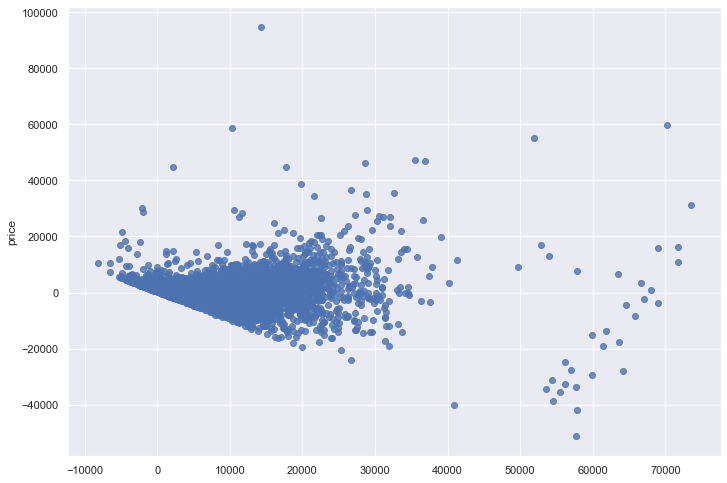

In [58]:
# Regression diagnostics-Residual plot analysis
residuals1 = y_test-cars_pred_lr1
sns.regplot(x=cars_pred_lr1, y=residuals1, scatter=True, fit_reg=False)
residuals1.describe()


In [59]:
# Random forest with omitted data

In [60]:
# model parameters
rf = RandomForestRegressor(n_estimators=100, max_depth = 100, max_features='auto',
                           min_samples_split=10, min_samples_leaf=4,random_state=1,n_jobs=-1)
model_rf1 = rf.fit(X_train, y_train)

In [61]:
# Predicting model on test data
cars_predictions_rf1 = rf.predict(X_test)

In [62]:
# computing mse and rmse

rf1_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf1_rmse1 = np.sqrt(rf1_mse1)
print(rf1_mse1, rf1_rmse1)


9880055.73501724 3143.2555949233974


In [63]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_lin_train1 = model_rf1.score(X_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.7087236272615314 0.9183805417560483


In [64]:
import pickle
model_dict ={'model':model_rf1,'description':'success prediction model','encoder_dict':encoders}
with open('price_pediction.pk','wb') as file:
    pickle.dump(model_dict,file)

In [65]:
cars

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.50
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.00
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.92
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.17
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.92
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.67
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.75
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.67
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.25


In [66]:
cars.columns.tolist()

['price',
 'vehicleType',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'Age']